### Parametric programs

In [1]:
from pyquil import Program, get_qc
from pyquil.gates import *

def ansatz(theta):
    program = Program()
    program += RY(theta, 0)
    return program

print(ansatz(theta=0.2))

RY(0.2) 0



In [2]:
def ansatz():
    program = Program()
    theta = program.declare('theta', memory_type='REAL')
    ro = program.declare('ro', memory_type='BIT', memory_size=1)
    program += RY(theta, 0)
    program += MEASURE(0, ro[0])
    return program

print(ansatz())

DECLARE theta REAL[1]
DECLARE ro BIT[1]
RY(theta) 0
MEASURE 0 ro[0]



### Snan using memory_map

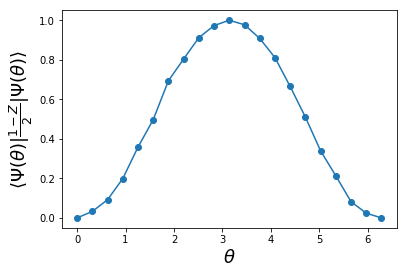

In [4]:
import numpy as np
qc = get_qc("9q-square-qvm")
program = ansatz()  # look ma, no arguments!
program.wrap_in_numshots_loop(shots=1000)
executable = qc.compile(program)

thetas = np.linspace(0, 2*np.pi, 21)
results = []
for theta in thetas:
    bitstrings = qc.run(executable, memory_map={'theta': [theta]})
    results.append(np.mean(bitstrings[:, 0]))

%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(thetas, results, 'o-')
plt.xlabel(r'$\theta$', fontsize=18)
_ = plt.ylabel(r'$\langle \Psi(\theta) | \frac{1 - Z}{2} | \Psi(\theta) \rangle$', fontsize=18)

## Optimization

In [7]:
import scipy.optimize
program = ansatz()  # look ma, no arguments!
program.wrap_in_numshots_loop(shots=1000)
executable = qc.compile(program)

def objective_function(thetas):
    bitstrings = qc.run(executable, memory_map={'theta': thetas})
    result = np.mean(bitstrings[:, 0])
    return -result

res = scipy.optimize.minimize(objective_function, x0=[0.1], method='COBYLA')
res

     fun: -1.0
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 17
  status: 1
 success: True
       x: array([ 3.19375])

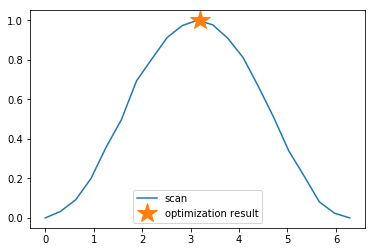

In [8]:
plt.plot(thetas, results, label='scan')
plt.plot([res.x], [-res.fun], '*', ms=20, label='optimization result')
plt.legend()